## K-means et CAH avec Python - Tutoriel de Eric Rakotomalala

Tutoriel disponible à cet emplacement : http://eric.univ-lyon2.fr/~ricco/cours/didacticiels/Python/cah_kmeans_avec_python.pdf  

&nbsp;


Les données sont disponibles à cet emplacement : http://www.math.u-bordeaux.fr/~mchave100p/teaching/


&nbsp;

[REQUIREMENTS.txt](#requirements)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import cluster, metrics

In [2]:
from utils.funcs import heatmap, annotate_heatmap

In [3]:
df = pd.read_table("../data/csv-txt/fromages/fromage.txt")

In [4]:
df.head()

,Fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [5]:
df.rename(columns={"Fromages":"fromages"}, inplace=True)

In [6]:
df.head()

,fromages,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,CarredelEst,314,353.5,72.6,26.3,51.6,30.3,21.0,70,20
1,Babybel,314,238.0,209.8,25.1,63.7,6.4,22.6,70,27
2,Beaufort,401,112.0,259.4,33.3,54.9,1.2,26.6,120,41
3,Bleu,342,336.0,211.1,28.9,37.1,27.5,20.2,90,27
4,Camembert,264,314.0,215.9,19.5,103.0,36.4,23.4,60,20


In [7]:
df.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fromages     29 non-null     object 
 1   calories     29 non-null     int64  
 2   sodium       29 non-null     float64
 3   calcium      29 non-null     float64
 4   lipides      29 non-null     float64
 5   retinol      29 non-null     float64
 6   folates      29 non-null     float64
 7   proteines    29 non-null     float64
 8   cholesterol  29 non-null     int64  
 9   magnesium    29 non-null     int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 4.0 KB


### 1. Analyse Univariée

In [8]:
# Résumé numérique des variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
calories,29.0,300.034483,91.914356,70.0,292.0,321.0,355.0,406.0
sodium,29.0,210.086207,108.678923,22.0,140.0,223.0,276.0,432.0
calcium,29.0,185.734483,72.528882,72.6,132.9,202.3,220.5,334.6
lipides,29.0,24.158621,8.129642,3.4,23.4,26.3,29.1,33.3
retinol,29.0,67.562069,24.163098,37.1,51.6,62.3,76.4,150.5
folates,29.0,13.010345,11.723339,1.2,4.9,6.4,21.1,36.4
proteines,29.0,20.168966,6.959788,4.1,17.8,21.0,23.4,35.7
cholesterol,29.0,74.586207,28.245755,10.0,70.0,80.0,90.0,120.0
magnesium,29.0,26.965517,11.318388,10.0,20.0,26.0,30.0,51.0


In [9]:
# décrire le jeu de données avec scipy qui renvoie un peu plus de détails statistiques

descr = stats.describe(df.iloc[:,1:])._asdict()
descr["min"] = descr["minmax"][0]
descr["max"] = descr["minmax"][1]

descr.pop("minmax")

pd.DataFrame(descr, index=df.iloc[:,1:].columns).T


,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
nobs,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,300.034483,210.086207,185.734483,24.158621,67.562069,13.010345,20.168966,74.586207,26.965517
variance,8448.248768,11811.108374,5260.438768,66.091084,583.855296,137.436675,48.438645,797.822660,128.105911
skewness,-1.339762,-0.034940,-0.009403,-1.476165,1.729924,0.842118,-0.451347,-0.748933,0.397620
kurtosis,0.883747,-0.685905,-0.780877,1.235582,3.204520,-0.835933,0.356029,0.331721,-0.630892
min,70.000000,22.000000,72.600000,3.400000,37.100000,1.200000,4.100000,10.000000,10.000000
max,406.000000,432.000000,334.600000,33.300000,150.500000,36.400000,35.700000,120.000000,51.000000


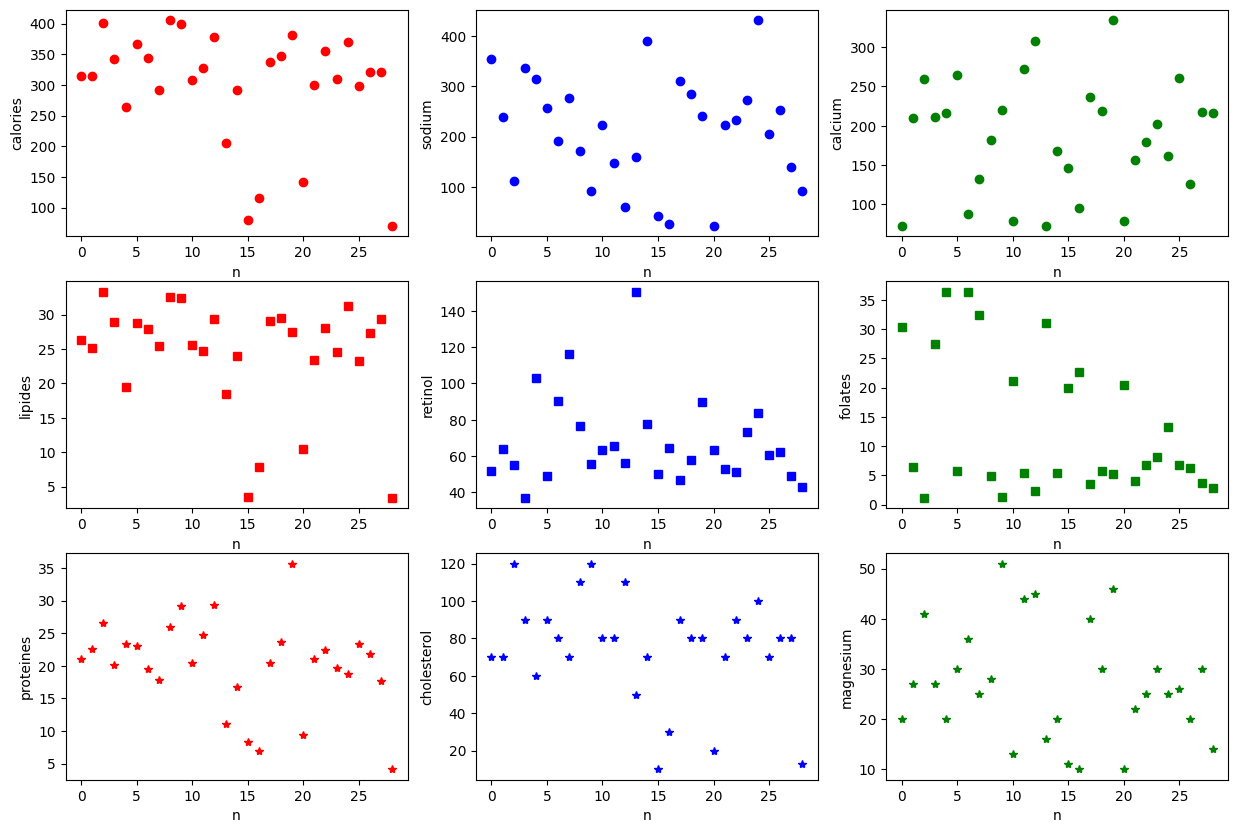

In [10]:
nrows = 3
ncols = 3
numerical_cols = df.iloc[:,1:].columns
ls_colors = ['ro','bo','go','rs','bs','gs','r*','b*','g*']

plt.figure(figsize=[15,10])

for i, c in enumerate(zip(numerical_cols, ls_colors)):    
    plt.subplot(nrows, ncols, i+1)
    plt.plot(df[c[0]], c[1])
    plt.xlabel("n")
    plt.ylabel(c[0])

plt.show()

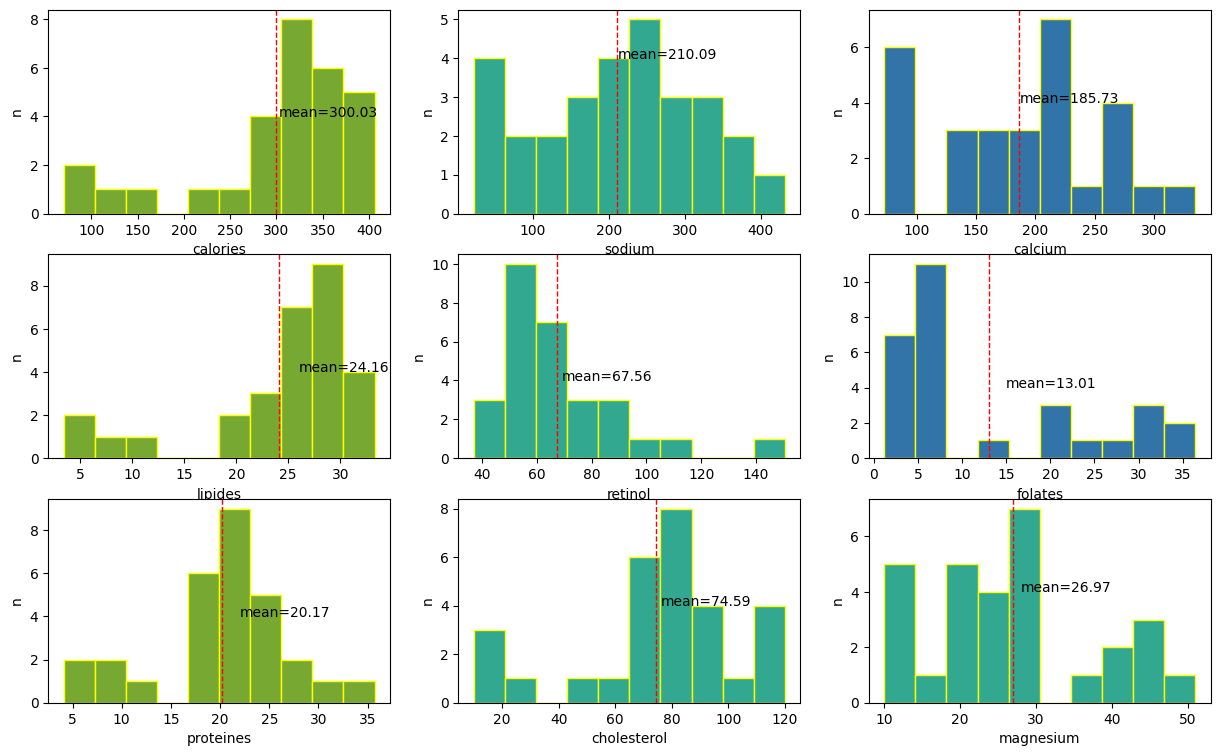

In [11]:
nrows = 3
ncols = 3
ls_colors = ['#77a832','#32a890','#3273a8','#77a832','#32a890','#3273a8','#77a832','#32a890','#32a890']

plt.figure(figsize=[15,9])

for i, c in enumerate(zip(numerical_cols, ls_colors)):
    plt.subplot(nrows, ncols, i+1)
    plt.hist(df[c[0]], color=c[1], edgecolor="yellow")
    plt.axvline(df[c[0]].mean(), color='r', linestyle='dashed', linewidth=1)
    plt.xlabel(c[0])
    plt.ylabel("n")
    plt.annotate(f"mean={round(df[c[0]].mean(),2)}", xy=(int(df[c[0]].mean()), 4.5),
                xytext=(int(df[c[0]].mean()) + 2, 4))

plt.show()

In [12]:
# Test de normalité -- Shapiro-Wilk (plus intéressant petits échantillons, <=50)
df.iloc[:,1:].apply(stats.shapiro, axis=0)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,0.826612,0.97862,0.958139,0.803046,0.836051,0.812560,0.943448,0.904171,0.952521
1,0.000261,0.80210,0.295547,0.000095,0.000398,0.000141,0.123454,0.012348,0.212698


In [13]:
# Test de normalité -- Jarque-Bera
df.iloc[:,1:].apply(stats.jarque_bera, axis=0)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,9.619365,0.574380,0.737232,12.376858,26.872725,4.271983,1.137782,2.843983,1.245104
1,0.008150,0.750369,0.691691,0.002053,0.000001,0.118127,0.566153,0.241233,0.536573


In [14]:
# Test de normalité -- Agostino
df.iloc[:,1:].apply(stats.normaltest, axis=0)

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
0,10.768172,0.465604,0.817628,12.99173,20.211019,5.146545,2.200696,4.154922,1.321584
1,0.004589,0.792310,0.664438,0.00151,0.000041,0.076285,0.332755,0.125248,0.516442


--------------------------------------------------------------------

### 2. Analyse Bivariée

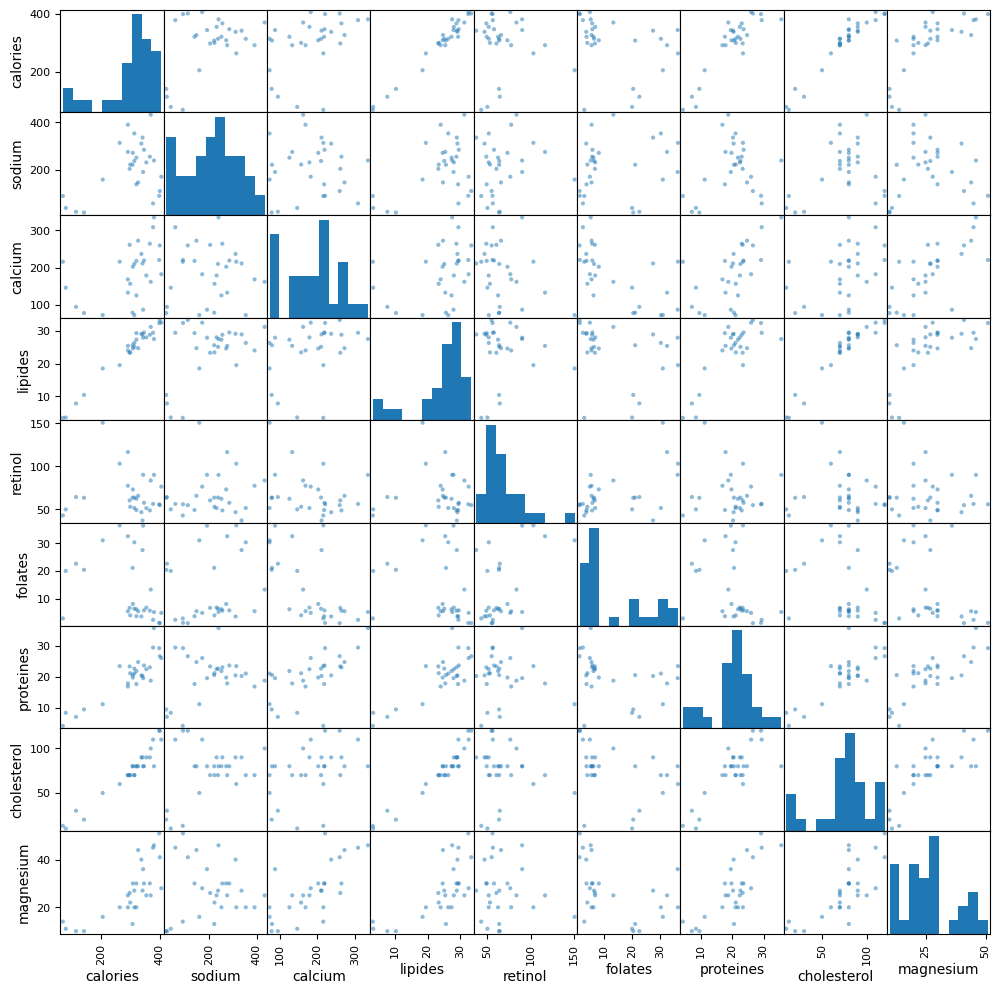

In [15]:
pd.plotting.scatter_matrix(df,figsize=(12,12))
plt.show()

In [16]:
# Matrice des corrélations
df.corr()

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
calories,1.000000,0.447224,0.433400,0.983634,-0.042885,-0.321098,0.885372,0.961923,0.745443
sodium,0.447224,1.000000,0.005959,0.483344,0.144328,0.136561,0.275998,0.332994,0.031113
calcium,0.433400,0.005959,1.000000,0.341132,-0.289547,-0.637503,0.610705,0.428446,0.710480
lipides,0.983634,0.483344,0.341132,1.000000,-0.018353,-0.276543,0.809303,0.955444,0.689860
retinol,-0.042885,0.144328,-0.289547,-0.018353,1.000000,0.517266,-0.039173,-0.086972,-0.099801
folates,-0.321098,0.136561,-0.637503,-0.276543,0.517266,1.000000,-0.352871,-0.366346,-0.447067
proteines,0.885372,0.275998,0.610705,0.809303,-0.039173,-0.352871,1.000000,0.817138,0.787777
cholesterol,0.961923,0.332994,0.428446,0.955444,-0.086972,-0.366346,0.817138,1.000000,0.752453
magnesium,0.745443,0.031113,0.710480,0.689860,-0.099801,-0.447067,0.787777,0.752453,1.000000


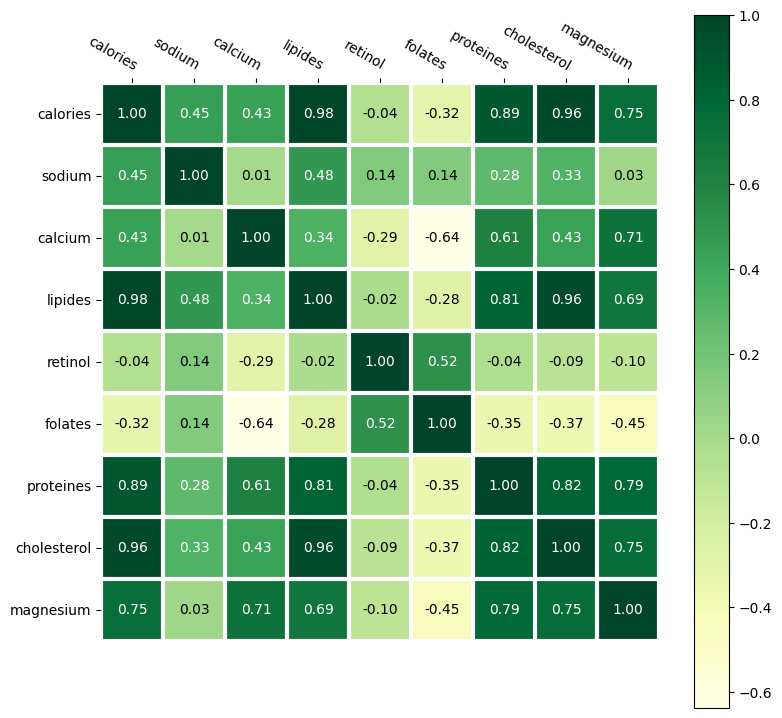

In [17]:
# Heatmap
corr = np.array(df.corr())

plt.figure(figsize=(9,9))
im, cbar = heatmap(corr, df.corr().columns, df.corr().columns, cmap="YlGn")
texts = annotate_heatmap(im)


In [18]:
# Matrice des corrélations de rang de Spearman
df.corr(method="spearman")

,calories,sodium,calcium,lipides,retinol,folates,proteines,cholesterol,magnesium
calories,1.000000,0.153505,0.504127,0.926944,-0.094370,-0.460449,0.735740,0.933754,0.799039
sodium,0.153505,1.000000,-0.016256,0.219212,0.136946,0.273679,0.088177,0.166251,0.065481
calcium,0.504127,-0.016256,1.000000,0.390148,-0.265517,-0.655007,0.651232,0.475468,0.750436
lipides,0.926944,0.219212,0.390148,1.000000,-0.172414,-0.422712,0.574877,0.927400,0.705712
retinol,-0.094370,0.136946,-0.265517,-0.172414,1.000000,0.442173,0.018227,-0.177268,-0.065234
folates,-0.460449,0.273679,-0.655007,-0.422712,0.442173,1.000000,-0.425668,-0.469767,-0.537133
proteines,0.735740,0.088177,0.651232,0.574877,0.018227,-0.425668,1.000000,0.625694,0.701264
cholesterol,0.933754,0.166251,0.475468,0.927400,-0.177268,-0.469767,0.625694,1.000000,0.744131
magnesium,0.799039,0.065481,0.750436,0.705712,-0.065234,-0.537133,0.701264,0.744131,1.000000


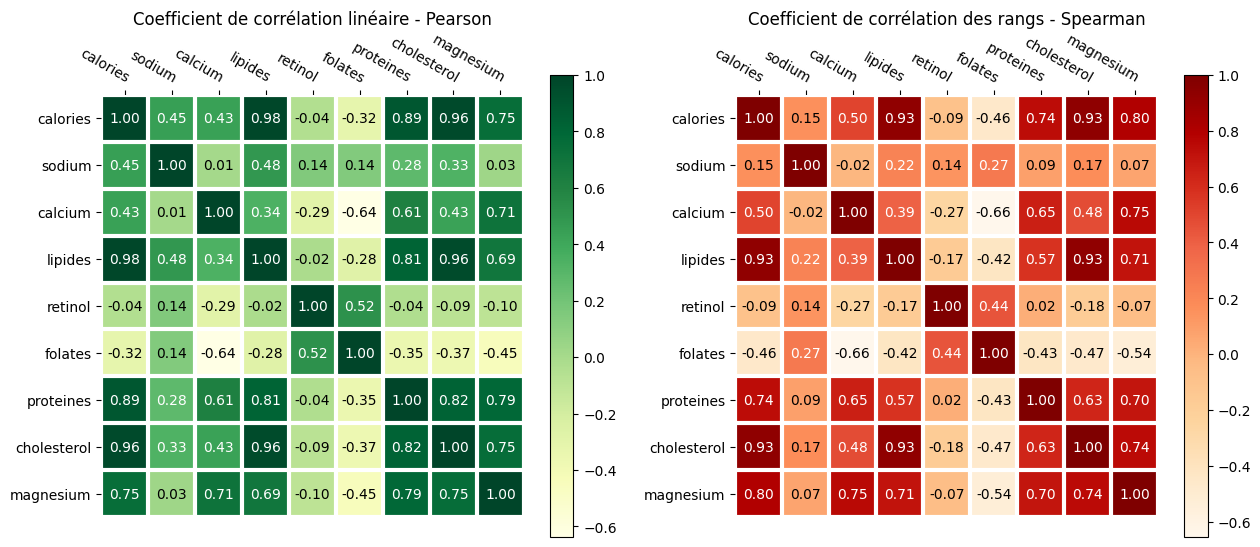

In [19]:
# Heatmaps
corr = np.array(df.corr())
corr_spearman = np.array(df.corr(method="spearman"))

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
im, cbar = heatmap(corr, df.corr().columns, df.corr().columns, cmap="YlGn")
texts = annotate_heatmap(im)
plt.title("Coefficient de corrélation linéaire - Pearson")

plt.subplot(1,2,2)
im, cbar = heatmap(corr_spearman, df.corr(method="spearman").columns, df.corr(method="spearman").columns, cmap="OrRd")
texts = annotate_heatmap(im)
plt.title("Coefficient de corrélation des rangs - Spearman")

plt.show()

### 3. Analyse Multivariée

In [20]:
## Standardisation
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
arr = sc.fit_transform(df.drop("fromages", axis=1))

In [21]:
mat_liens = linkage(arr, method="ward", metric="euclidean")

In [22]:
mat_liens.shape

(28, 4)

In [23]:
mat_liens

array([[16.        , 20.        ,  0.7356902 ,  2.        ],
       [ 1.        , 23.        ,  0.82483528,  2.        ],
       [ 5.        , 18.        ,  0.89672969,  2.        ],
       [21.        , 26.        ,  0.95935419,  2.        ],
       [ 2.        ,  9.        ,  1.14064288,  2.        ],
       [22.        , 32.        ,  1.24708148,  3.        ],
       [25.        , 30.        ,  1.24972145,  3.        ],
       [17.        , 31.        ,  1.32826122,  3.        ],
       [12.        , 33.        ,  1.42130185,  3.        ],
       [15.        , 29.        ,  1.70034202,  3.        ],
       [ 0.        , 10.        ,  1.72093864,  2.        ],
       [27.        , 35.        ,  1.86859757,  4.        ],
       [ 4.        ,  7.        ,  1.88685685,  2.        ],
       [14.        , 24.        ,  1.92182722,  2.        ],
       [34.        , 40.        ,  2.20413434,  7.        ],
       [11.        , 36.        ,  2.35092294,  4.        ],
       [ 8.        , 44.

In [24]:
mat_liens[-10:, 2]

array([ 2.83244751,  3.09641867,  3.14971979,  3.55080524,  3.5931852 ,
        4.0451875 ,  5.61774478,  7.92082284,  9.64780285, 14.55808188])

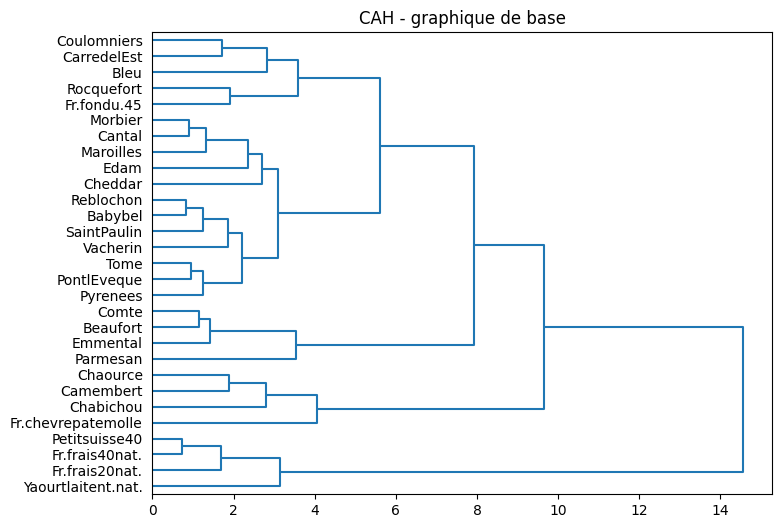

In [25]:
plt.figure(figsize=(8,6))

plt.title("CAH - graphique de base")
dendrogram(mat_liens, labels=df.fromages.to_numpy(), orientation="right", color_threshold=0)
plt.show()

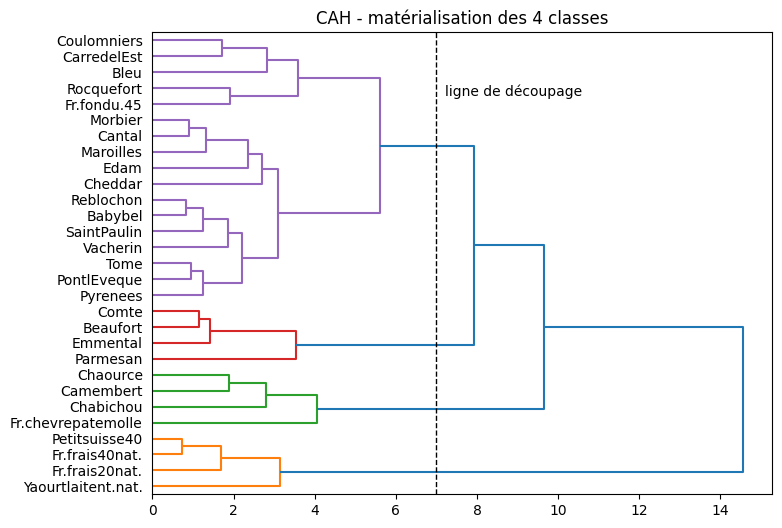

In [26]:
## Découpage en 4 classes
plt.figure(figsize=(8,6))

plt.title("CAH - matérialisation des 4 classes")
dendrogram(mat_liens, labels=df.fromages.to_numpy(), orientation="right", color_threshold=7)
plt.axvline(7, color='black', linestyle='dashed', linewidth=1)
plt.annotate("ligne de découpage", xy=(7, 4.5), xytext=(7.2, 250))
plt.show()

In [27]:
## Extraction des 4 groupes

groupes = fcluster(mat_liens, t=7, criterion="distance")
groupes

array([4, 4, 3, 4, 2, 4, 2, 2, 4, 3, 4, 4, 3, 2, 4, 1, 1, 4, 4, 3, 1, 4,
       4, 4, 4, 4, 4, 4, 1], dtype=int32)

In [28]:
# Tri des indices des groupes

idx = np.argsort(groupes)
idx

array([28, 15, 20, 16, 13,  4,  6,  7, 12, 19,  2,  9, 22, 21, 24, 25, 26,
       23,  0, 17, 27, 11, 10,  8,  5,  3,  1, 18, 14], dtype=int64)

In [29]:
pd.DataFrame({"Fromage":df.fromages[idx], "Groupe":groupes[idx]})

,Fromage,Groupe
28,Yaourtlaitent.nat.,1
15,Fr.frais20nat.,1
20,Petitsuisse40,1
16,Fr.frais40nat.,1
13,Fr.chevrepatemolle,2
4,Camembert,2
6,Chabichou,2
7,Chaource,2
12,Emmental,3
19,Parmesan,3


In [30]:
#moyenne par variable
m = df.mean()

print("Moyennes par variables \n")
print(m)
print("\n===========================================\n")

#TSS
TSS = df.shape[0]*df.var(ddof=0)
print(TSS)


Moyennes par variables 

calories       300.034483
sodium         210.086207
calcium        185.734483
lipides         24.158621
retinol         67.562069
folates         13.010345
proteines       20.168966
cholesterol     74.586207
magnesium       26.965517
dtype: float64


calories       236550.965517
sodium         330711.034483
calcium        147292.285517
lipides          1850.550345
retinol         16347.948276
folates          3848.226897
proteines        1356.282069
cholesterol     22339.034483
magnesium        3586.965517
dtype: float64


C:\Users\Nelly\AppData\Local\Temp\ipykernel_15124\140389834.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  m = df.mean()
C:\Users\Nelly\AppData\Local\Temp\ipykernel_15124\140389834.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  TSS = df.shape[0]*df.var(ddof=0)


In [31]:
# Interprétation des classes (univariée)

#dataframe conditionnellement aux groupes
gb_cah = df.groupby(groupes)

#effectifs conditionnels
nk_cah= gb_cah.size()

#moyennes conditionnelles
mk_cah= gb_cah.mean()

print("Moyennes conditionnelles aux groupes \n")
print(mk_cah)
print("\n===========================================\n")

#pour chaque groupe, écart à la moyenne par variable
EMk_cah= (mk_cah - m)**2

#pondéré par les effectifs du groupe
EM_cah = EMk_cah.multiply(nk_cah,axis=0)

#somme des valeurs => BSS
BSS_cah = np.sum(EM_cah,axis=0)

#carré du rapport de corrélation
eta2_cah = BSS_cah/TSS

print("Part de la variance totale expliquée par l'appartenance aux groupes \n")
print(eta2_cah.sort_values(ascending=False))

Moyennes conditionnelles aux groupes 

     calories      sodium  calcium    lipides     retinol    folates  \
1  101.750000   44.750000  133.750   6.275000   55.150000  16.475000   
2  276.500000  235.500000  127.200  22.825000  115.000000  34.050000   
3  389.750000  126.000000  280.675  30.650000   64.275000   2.525000   
4  331.117647  262.794118  189.400  27.152941   60.094118   9.711765   

   proteines  cholesterol  magnesium  
1   7.200000    18.250000  11.250000  
2  17.950000    65.000000  24.250000  
3  30.225000   107.500000  45.750000  
4  21.376471    82.352941  26.882353  


Part de la variance totale expliquée par l'appartenance aux groupes 

calories       0.879737
lipides        0.868597
proteines      0.827080
cholesterol    0.824628
magnesium      0.677160
retinol        0.648949
folates        0.634948
sodium         0.566772
calcium        0.412770
dtype: float64


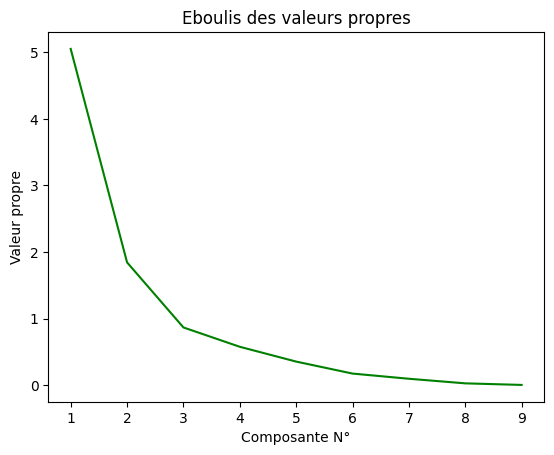

In [32]:
## Interprétation des classes (multivarié) pour tenir compte des liaisons entres les variables
## Ici, le cluster est considéré comme une variable illustrative (quali)

from sklearn.decomposition import PCA

acp = PCA(svd_solver="full")
coords = acp.fit_transform(arr)
val_propres = (acp.singular_values_**2/df.shape[0])

plt.plot(np.arange(1, df.shape[1]), val_propres, "g-")
plt.title("Eboulis des valeurs propres")
plt.xlabel("Composante N°")
plt.ylabel("Valeur propre")
plt.show()

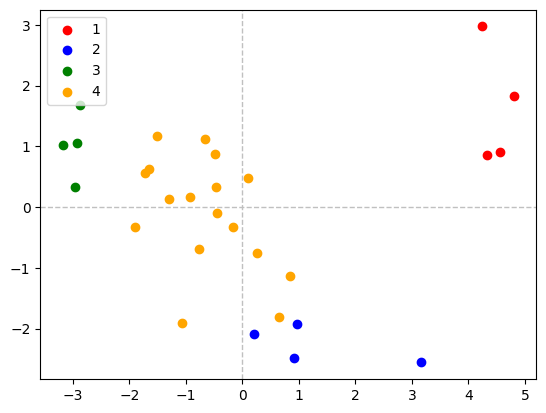

In [33]:
## Affichage des clusters dans le 1er plan factoriel

for couleur, k in zip(['red','blue','green','orange'], np.unique(groupes)):
    plt.scatter(coords[groupes== k , 0], coords[groupes == k, 1], c=couleur, label=k)
    
plt.legend()
plt.axvline(0, color="silver", linestyle="dashed", linewidth=1)
plt.axhline(0, color="silver", linestyle="dashed", linewidth=1)
plt.show()

## <a id="requirements" style="color:black">REQUIREMENTS.txt</a>

<span style="color:orange">Ce notebook a été créé avec python 3.8</span>

Requirements.txt  

```
absl-py==2.1.0
anyio==4.0.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0       
arrow==1.2.3
asttokens==2.4.0
astunparse==1.6.3
async-lru==2.0.4
attrs==23.1.0
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.12.2
bleach==6.0.0
cachetools==4.2.4
certifi==2023.7.22
cffi==1.15.1
charset-normalizer==2.0.12
colorama==0.4.6
comm==0.1.4
cycler==0.11.0
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.1.3
executing==1.2.0
fastjsonschema==2.18.0
fonttools==4.42.1
fqdn==1.5.1
gast==0.3.3
google-auth==1.35.0
google-auth-oauthlib==0.4.6        
google-pasta==0.2.0
grpcio==1.66.2
h5py==2.10.0
htmlmin==0.1.12
idna==3.4
ImageHash==4.3.1
importlib-metadata==8.5.0
importlib-resources==6.4.5
ipykernel==6.25.2
ipython==8.12.0
ipython-genutils==0.2.0
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.0
Jinja2==3.1.2
joblib==1.1.1
json5==0.9.14
jsonpointer==2.4
jsonschema==4.19.0
jsonschema-specifications==2023.7.1
jupyter==1.0.0
jupyter-client==8.3.1
jupyter-console==6.6.3
jupyter-core==5.3.1
jupyter-events==0.7.0
jupyter-lsp==2.2.0
jupyter-server==2.7.3
jupyter-server-terminals==0.4.4
jupyterlab==4.0.6
jupyterlab-pygments==0.2.2
jupyterlab-server==2.25.0
jupyterlab-widgets==3.0.9
Keras==2.4.3
Keras-Preprocessing==1.1.2
kiwisolver==1.4.5
Markdown==3.7
MarkupSafe==2.1.3
matplotlib==3.5.3
matplotlib-inline==0.1.6
missingno==0.5.2
mistune==3.0.1
multimethod==1.8
nbclient==0.8.0
nbconvert==7.8.0
nbformat==5.9.2
nest-asyncio==1.5.8
networkx==3.1
notebook==7.0.3
notebook-shim==0.2.3
numpy==1.22.0
oauthlib==3.2.2
opt-einsum==3.4.0
overrides==7.4.0
packaging==23.1
pandas==1.4.0
pandas-profiling==3.3.0
pandocfilters==1.5.0
parso==0.8.3
patsy==0.5.3
pexpect==4.8.0
phik==0.12.3
pickleshare==0.7.5
Pillow==10.0.1
pkgutil-resolve-name==1.3.10
platformdirs==3.10.0
prometheus-client==0.17.1
prompt-toolkit==3.0.39
protobuf==3.20.3
psutil==5.9.5
ptyprocess==0.7.0
pure-eval==0.2.2
pyasn1==0.6.1
pyasn1-modules==0.4.1
pycparser==2.21
pydantic==1.9.2
Pygments==2.16.1
pyparsing==3.1.1
python-dateutil==2.8.2
python-json-logger==2.0.7
pytz==2023.3.post1
PyWavelets==1.4.1
pywin32==306
pywinpty==2.0.13
PyYAML==6.0.1
pyzmq==25.1.1
qtconsole==5.4.4
QtPy==2.4.0
referencing==0.30.2
requests==2.28.0
requests-oauthlib==2.0.0
rfc3339-validator==0.1.4
rfc3986-validator==0.1.1
rpds-py==0.10.3
rsa==4.9
scikit-learn==0.23.2
scipy==1.4.1
seaborn==0.11.2
Send2Trash==1.8.2
six==1.16.0
sniffio==1.3.0
soupsieve==2.5
stack-data==0.6.2
statsmodels==0.13.5
tangled-up-in-unicode==0.2.0
tensorboard==2.2.2
tensorboard-plugin-wit==1.8.1
tensorflow==2.2.0
tensorflow-estimator==2.2.0
termcolor==2.4.0
terminado==0.17.1
threadpoolctl==3.5.0
tinycss2==1.2.1
tomli==2.0.1
tornado==6.3.3
tqdm==4.64.1
traitlets==5.10.0
typing-extensions==4.7.1
uri-template==1.3.0
urllib3==1.26.16
visions==0.7.5
wcwidth==0.2.6
webcolors==1.13
webencodings==0.5.1
websocket-client==1.6.3
werkzeug==3.0.4
widgetsnbextension==4.0.9
wrapt==1.16.0
xlrd==2.0.1
zipp==3.20.2
```